In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
x_df = pd.read_csv('x_train.csv')
x_cleaned_df = pd.read_csv('x_train_cleaned.csv')
y_df = pd.read_csv('y_train.csv')

In [4]:
# 2. 진동성 계산 함수
def get_oscillation_features(df):
    stats = []
    for sample in df['Sample_Number'].unique():
        sub_df = df[df['Sample_Number'] == sample].copy()
        sub_df['delta'] = sub_df['in_co2'].diff()
        std_diff = sub_df['delta'].std()
        peak_to_peak = (sub_df['in_co2'].max() - sub_df['in_co2'].min()) / sub_df['in_co2'].mean()
        mean_val = sub_df['in_co2'].mean()
        crossings = ((sub_df['in_co2'] > mean_val) != (sub_df['in_co2'].shift(1) > mean_val)).sum()

        stats.append({
            'Sample_Number': sample,
            'std_diff': std_diff,
            'peak_to_peak_ratio': peak_to_peak,
            'crossings': crossings
        })
    return pd.DataFrame(stats)

# 3. 진동성 있는 샘플 필터링
osc_df = get_oscillation_features(x_df)
q2_std = osc_df['std_diff'].quantile(0.5)

# 조건 적용
oscillating_samples = osc_df[
    (osc_df['std_diff'] > q2_std) &
    (osc_df['peak_to_peak_ratio'] > 0.08) &
    (osc_df['crossings'] > 20)
]['Sample_Number'].tolist()

print("진동성 있는 샘플:", oscillating_samples)

진동성 있는 샘플: [124, 125, 126, 127, 129, 130, 131, 132, 134, 135, 136, 137, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 156, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 178, 179, 180, 182, 183, 184, 185, 187, 188, 189, 192, 193, 195, 196, 199, 200, 201, 203, 204, 205, 207, 208, 209, 212, 213, 214, 215, 217, 220]


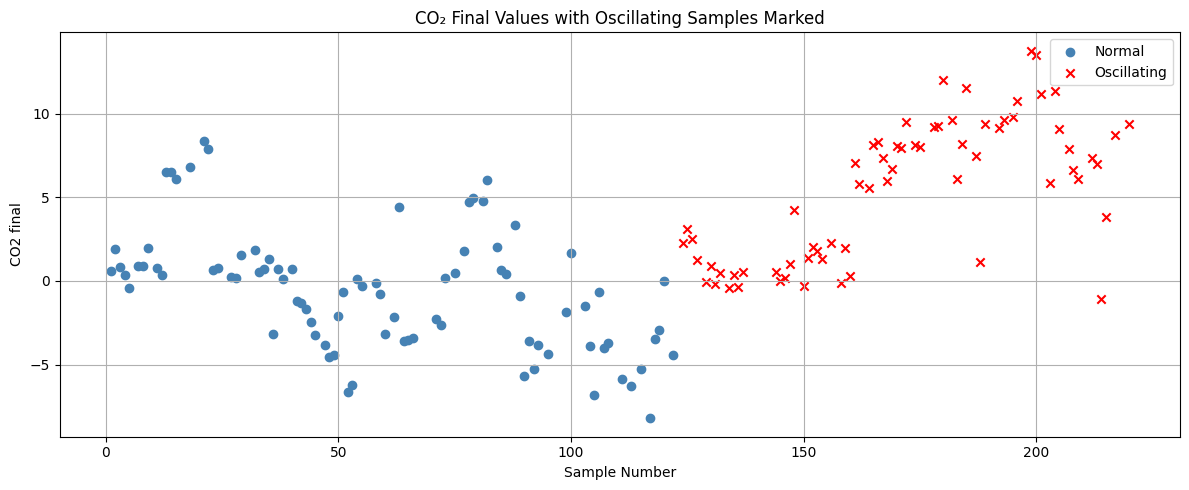

In [8]:
plt.figure(figsize=(12, 5))

for _, row in y_df.iterrows():
    sample = row['Sample_Number']
    y_val = row['CO2 final']

    if sample in oscillating_samples:
        plt.scatter(sample, y_val, marker='x', color='red', label='Oscillating' if 'Oscillating' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(sample, y_val, marker='o', color='steelblue', label='Normal' if 'Normal' not in plt.gca().get_legend_handles_labels()[1] else "")

# 3. 라벨 및 스타일
plt.title("CO₂ Final Values with Oscillating Samples Marked")
plt.xlabel("Sample Number")
plt.ylabel("CO2 final")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()